In [23]:
%matplotlib inline

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint

from math import sqrt, fabs
from scipy.optimize import minimize
from IPython.display import Image
from matplotlib.pyplot import imshow
from random import randint

sys.path.append('../')
from map import Map
from optimizer import *

plt.rcParams['figure.figsize'] = [24, 16] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50


In [79]:
# Select the test data to use
import data.brevent as data

# Picture taken by the photographer

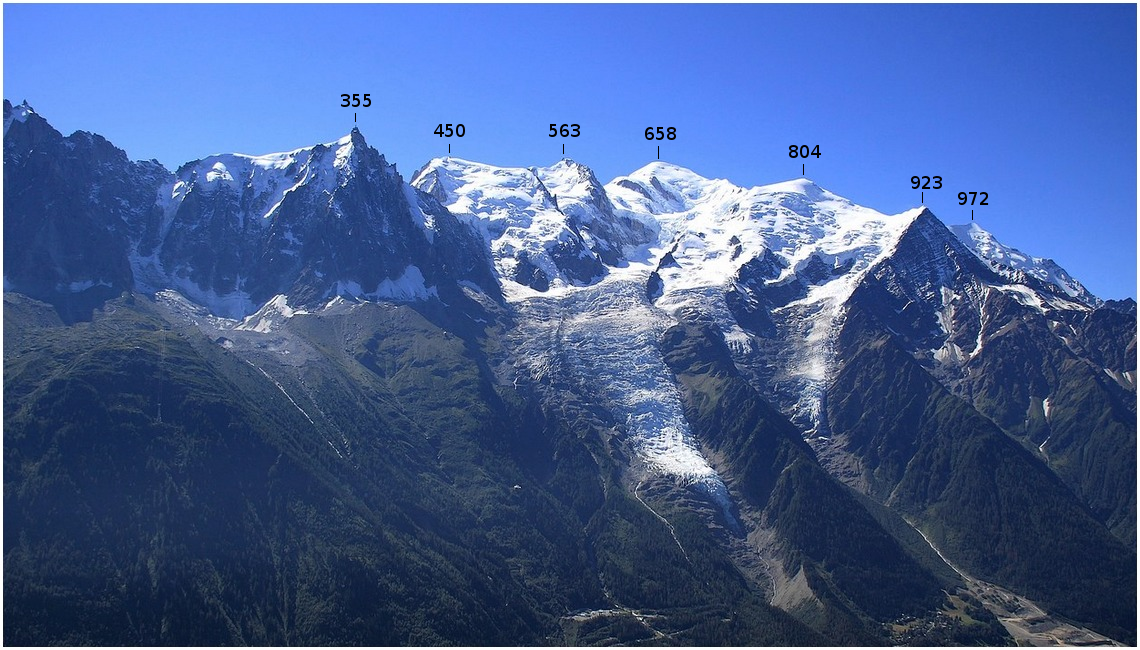

In [80]:
Image(filename=data.picture)

# And here is the map

Now, the big question. Where was the photographer?

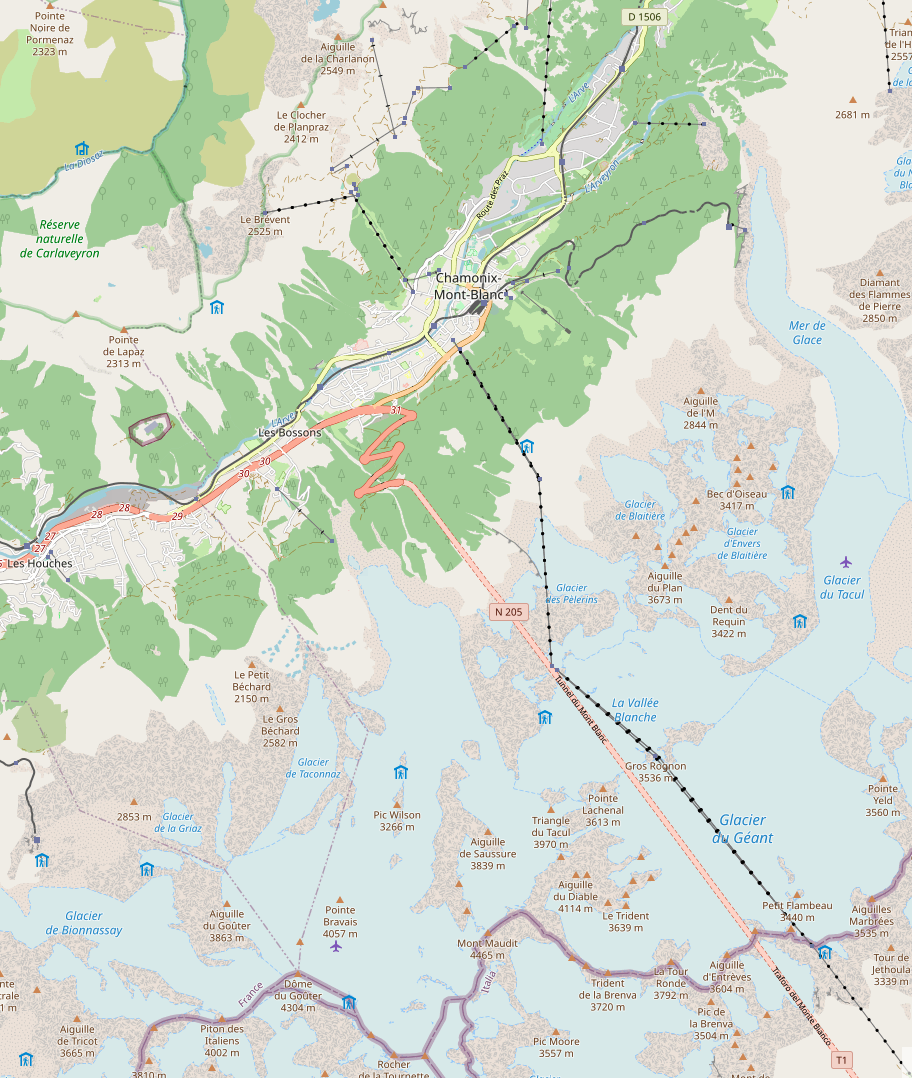

In [81]:
Image(filename=data.map)

In [82]:
# Basic info from teh data set
print(data.description, "\n")

print("Summits & projections data:")
pprint.pprint(data.points)


A picture supposely taken from the Brevent. 

Summits & projections data:
[('Aiguille du Midi', (45.8793106, 6.8874243), (553, 410), 35.5),
 ('Mont Blanc du Tacul', (45.8566202, 6.8878189), (560, 221), 45.0),
 ('Mont Maudit', (45.8479158, 6.8749911), (488, 145), 56.3),
 ('Mont Blanc', (45.8326218, 6.8651749), (424, 22), 65.8),
 ('Dome du Gouter', (45.8428166, 6.8434424), (298, 104), 80.4),
 ('Aiguille du Gouter', (45.8508455, 6.831278), (226, 174), 92.3),
 ('Aiguille de Bionnassay', (45.8357347, 6.8184001), (153, 50), 97.2)]


## Let's decorate the map with:
 - the points identified
 - the possible zone where the photographer can be

Barrycenter: (259.2255988685583, 686.8532749933704)


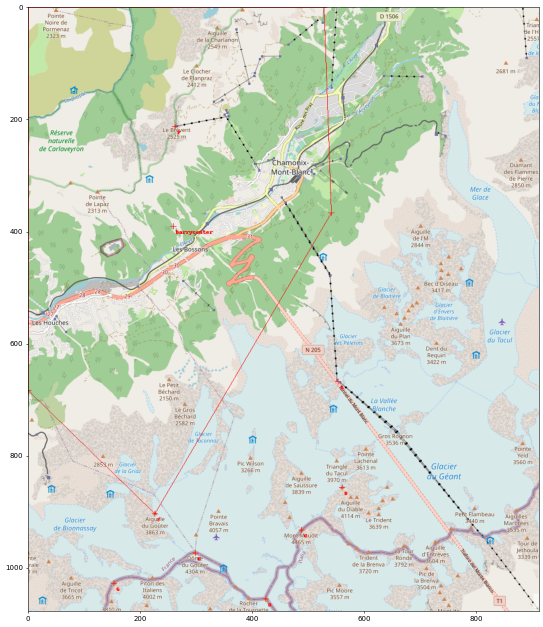

In [83]:
# Create a map and start drawing summits, photographer and area
map = Map(file=data.map)
for (summit, name) in zip(data.summits, "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(summit, name, color="red")

if data.photographer is not None:
    map.draw_point(data.photographer, "P", color="red")

area = photographer_area(data.summits, data.dimensions)
map.draw_area(area, color="red")

barrycenter = barycenter(area)
map.draw_point(barrycenter, "barrycenter", color="red")
print("Barrycenter:", barrycenter)

map.show()

# Let's find the photographer!

Optimizer:
  photographer: [384.71779379 801.73298565]
  error: 3.862469207512133e-05

Reality  :
  photographer: (262, 865)
  error: 0.0011253946741283428



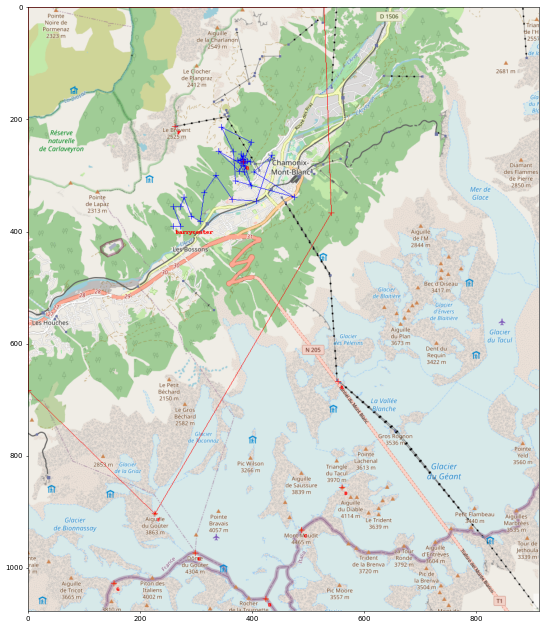

In [84]:
# Run the optimizer to locate the photographer
photograper, error, path = find_photograper(
    dimensions=map.dimensions,
    summits=data.summits,
    projections=data.projections
)
print("Optimizer:\n  photographer: {}\n  error: {}\n".format(photograper, error))
#pprint.pprint(path)

# Compute error at real location (or barrycenter)
refname, refpos = "Barrycenter", barrycenter
if data.photographer is not None:
    refname, refpos = "Reality", data.photographer
res = optimize_picture(photographer=refpos, summits=data.summits, projections=data.projections)
print("{}  :\n  photographer: {}\n  error: {}\n".format(refname, refpos, res.error))

# Display optimized position of the photographer
map.draw_path(path, color="blue")
map.draw_point(photograper, name="Q", color="red")

map.show()

#  visualization of the error function

In [85]:
# Do not merge with previous cell to benefit from the caching.  
def errorfun(point):
    return optimize_picture(point, data.summits, data.projections).error

1% 2% 3% 4% 5% 6% 7% 8% 9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99% 100% 
error min, max: 0.000041, 104.608854


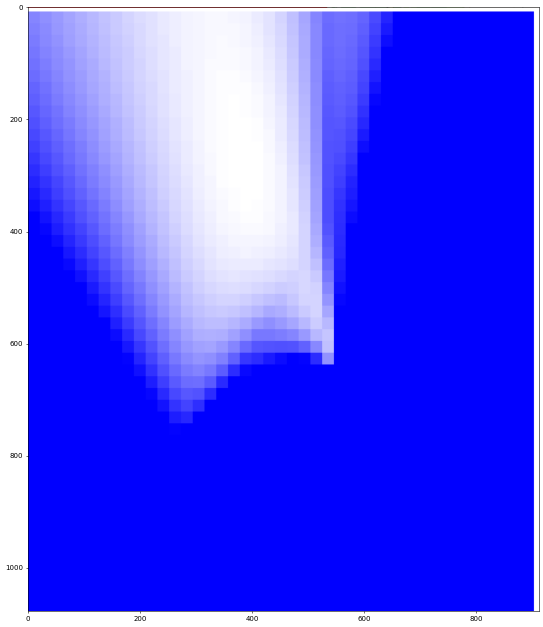

In [86]:
map.hot_colorize(
    colorfun=errorfun,
    transfun=lambda x: 10000*x,
    incr=10,
).show()

# Test sensitivity to misplaced points & projections

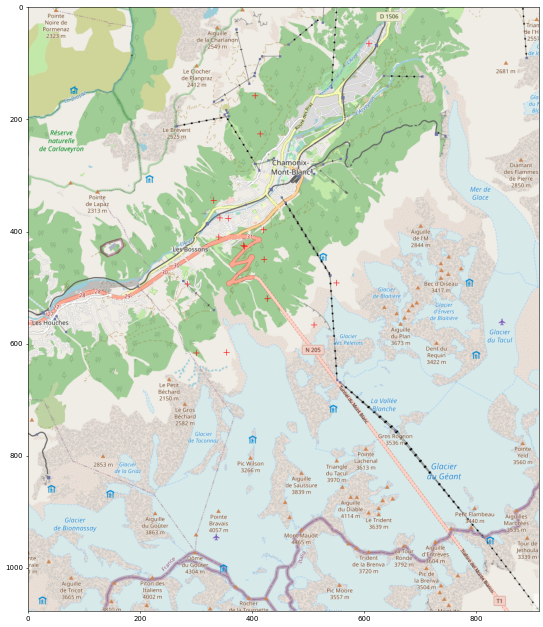

In [87]:
# Create a map and start drawing summits, photographer and area
map = Map(file=data.map)

stddev = 5

for i in range(20):
    # slightly moves summits & projections
    summits = [
        (s[0] + randint(-stddev, stddev), s[1] + randint(-stddev, stddev))
        for s in data.summits
    ]
    projections = [
        p + randint(-stddev, stddev)
        for p in data.projections
    ]
    photograper, error, path = find_photograper(
        dimensions=map.dimensions,
        summits=summits,
        projections=projections
    )
    map.draw_point(photograper, color="red")

map.show()